# Final project: 
   ##  &emsp; Music Recommendation System
### Group members: 
#### &emsp; 賀翊舜 105061128 吳柏澔 105061132

## Read files

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

members = pd.read_csv('members.csv',parse_dates=["registration_init_time","expiration_date"])
members.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,2011-08-20,2017-09-20
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,2015-06-28,2017-06-22
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,2016-04-11,2017-07-12
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,2015-09-06,2015-09-07
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,2017-01-26,2017-06-13


In [2]:
songs = pd.read_csv('songs.csv')
songs.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [3]:
df_train = pd.read_csv("train.csv")
df_train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [4]:
df_songs = pd.read_csv("songs.csv")
df_songs.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [5]:
df_songs_extra = pd.read_csv("song_extra_info.csv")
df_songs_extra.head()

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001


In [6]:
df_test = pd.read_csv("test.csv")
df_test.head()

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio


# Preprocessing
## Merge data

In [7]:
res = df_train.merge(df_songs[['song_id','song_length','genre_ids','artist_name','language']], on=['song_id'], how='left')
res.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,language
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,206471.0,359,Bastille,52.0
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,284584.0,1259,Various Artists,52.0
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,225396.0,1259,Nas,52.0
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1,255512.0,1019,Soundway,-1.0
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1,187802.0,1011,Brett Young,52.0


In [8]:
train = res.merge(members,on=['msno'],how = 'left')
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,language,city,bd,gender,registered_via,registration_init_time,expiration_date
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,206471.0,359,Bastille,52.0,1,0,NaN,7,2012-01-02,2017-10-05
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,284584.0,1259,Various Artists,52.0,13,24,female,9,2011-05-25,2017-09-11
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,225396.0,1259,Nas,52.0,13,24,female,9,2011-05-25,2017-09-11
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1,255512.0,1019,Soundway,-1.0,13,24,female,9,2011-05-25,2017-09-11
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1,187802.0,1011,Brett Young,52.0,1,0,NaN,7,2012-01-02,2017-10-05


In [9]:
test = df_test.merge(df_songs[['song_id','song_length','genre_ids','artist_name','language']], on=['song_id'], how='left')
test = test.merge(members,on=['msno'],how = 'left')
test.head()

,id,msno,song_id,source_system_tab,source_screen_name,source_type,song_length,genre_ids,artist_name,language,city,bd,gender,registered_via,registration_init_time,expiration_date
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library,224130.0,458,梁文音 (Rachel Liang),3.0,1,0,NaN,7,2016-02-19,2017-09-18
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library,320470.0,465,林俊傑 (JJ Lin),3.0,1,0,NaN,7,2016-02-19,2017-09-18
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist,315899.0,2022,Yu Takahashi (高橋優),17.0,1,0,NaN,4,2016-11-17,2016-11-24
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio,285210.0,465,U2,52.0,3,30,male,9,2007-07-25,2017-04-30
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio,197590.0,873,Yoga Mr Sound,-1.0,3,30,male,9,2007-07-25,2017-04-30


## 填補missing value

In [10]:
values1 = {'source_system_tab':train['source_system_tab'].mode()[0],
          'source_screen_name':train['source_screen_name'].mode()[0],
          'source_type':train['source_type'].mode()[0],
          'song_length':train['song_length'].mean(),
          'genre_ids':train['genre_ids'].mode()[0],
          'artist_name':train['artist_name'].mode()[0],
          'language':train['language'].mode()[0],
          'gender':train['gender'].mode()[0],                                  
         }
values2 = {'source_system_tab':test['source_system_tab'].mode()[0],
          'source_screen_name':test['source_screen_name'].mode()[0],
          'source_type':test['source_type'].mode()[0],
          'song_length':test['song_length'].mean(),
          'genre_ids':test['genre_ids'].mode()[0],
          'artist_name':test['artist_name'].mode()[0],
          'language':test['language'].mode()[0],
          'gender':test['gender'].mode()[0],                                  
         }
train_new = train.fillna(value=values1)
test_new =test.fillna(value=values2)

## Encoding

In [11]:
from sklearn.preprocessing import LabelEncoder

class_le = LabelEncoder()

train_new['source_system_tab']=class_le.fit_transform(train_new['source_system_tab'].astype(str))
test_new['source_system_tab']=class_le.fit_transform(test_new['source_system_tab'].astype(str))
train_new['source_screen_name']=class_le.fit_transform(train_new['source_screen_name'].astype(str))
test_new['source_screen_name']=class_le.fit_transform(test_new['source_screen_name'].astype(str))
train_new['source_type']=class_le.fit_transform(train_new['source_type'].astype(str))
test_new['source_type']=class_le.fit_transform(test_new['source_type'].astype(str))
train_new['gender']=class_le.fit_transform(train_new['gender'].astype(str))
test_new['gender']=class_le.fit_transform(test_new['gender'].astype(str))

## 對artist_name做處理

### 首先先觀察train和test中有幾位artist，再來找出有出現相同的人

In [12]:
print(train_new['artist_name'].nunique())
print(test_new['artist_name'].nunique())
print("Number of Common Artists in both train & Test : ", len(set.intersection(set(train_new['artist_name']), set(test_new['artist_name']))))

print(train_new['source_screen_name'].nunique())

40582
27563
Number of Common Artists in both train & Test :  21773
20


In [13]:
artist_name = train_new.loc[:,["artist_name","target"]]

artists1 = artist_name.groupby(["artist_name"],as_index=False).sum().rename(columns={"target":"repeat_count"})

artists2 = artist_name.groupby(["artist_name"],as_index=False).count().rename(columns = {"target":"play_count"})


In [14]:
artist_repeats = artists1.merge(artists2,how="inner",on="artist_name")
artist_repeats.head()

,artist_name,repeat_count,play_count
0,!Conz,1,1
1,!magnic!,0,1
2,#037 (#037),20,84
3,#1 Beatles Now,7,32
4,#1 Club Hits - Best Of Dance & Techno,5,7


### 計算repeat percentage

In [15]:
artist_repeats["repeat_percentage"] = round((artist_repeats['repeat_count']*100) / artist_repeats['play_count'],1)
artist_repeats.head()

,artist_name,repeat_count,play_count,repeat_percentage
0,!Conz,1,1,100.0
1,!magnic!,0,1,0.0
2,#037 (#037),20,84,23.8
3,#1 Beatles Now,7,32,21.9
4,#1 Club Hits - Best Of Dance & Techno,5,7,71.4


### 將多餘的column刪除

In [16]:
artist_repeats.drop(["repeat_count","play_count"],axis=1,inplace=True)
train_new = train_new.merge(artist_repeats,on="artist_name",how="left").rename(columns={"repeat_percentage":"artist_repeat_percentage"})
test_new = test_new.merge(artist_repeats,on="artist_name",how="left").rename(columns={"repeat_percentage":"artist_repeat_percentage"})

train_new['artist_repeat_percentage'].fillna(value=0.0,inplace=True)
test_new['artist_repeat_percentage'].fillna(value=0.0,inplace=True)


In [17]:
train_new.drop(["genre_ids","artist_name"],axis=1,inplace=True)

test_new.drop(["genre_ids","artist_name"],axis=1,inplace=True)
train_new.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,language,city,bd,gender,registered_via,registration_init_time,expiration_date,artist_repeat_percentage
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,1,7,6,1,206471.0,52.0,1,0,1,7,2012-01-02,2017-10-05,46.3
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,3,8,4,1,284584.0,52.0,13,24,0,9,2011-05-25,2017-09-11,51.0
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,3,8,4,1,225396.0,52.0,13,24,0,9,2011-05-25,2017-09-11,21.5
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,3,8,4,1,255512.0,-1.0,13,24,0,9,2011-05-25,2017-09-11,100.0
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,1,7,6,1,187802.0,52.0,1,0,1,7,2012-01-02,2017-10-05,37.7


### 因為msno(為用戶id)和song_id再後面幾項feature中，有足夠的訊息可以判斷，所以將這兩個feature刪除

In [18]:
train_new.drop(["msno","song_id"],axis=1,inplace=True)
test_new.drop(["msno","song_id"],axis=1,inplace=True)

In [19]:
train_new.head()

,source_system_tab,source_screen_name,source_type,target,song_length,language,city,bd,gender,registered_via,registration_init_time,expiration_date,artist_repeat_percentage
0,1,7,6,1,206471.0,52.0,1,0,1,7,2012-01-02,2017-10-05,46.3
1,3,8,4,1,284584.0,52.0,13,24,0,9,2011-05-25,2017-09-11,51.0
2,3,8,4,1,225396.0,52.0,13,24,0,9,2011-05-25,2017-09-11,21.5
3,3,8,4,1,255512.0,-1.0,13,24,0,9,2011-05-25,2017-09-11,100.0
4,1,7,6,1,187802.0,52.0,1,0,1,7,2012-01-02,2017-10-05,37.7


## 對年齡做分群

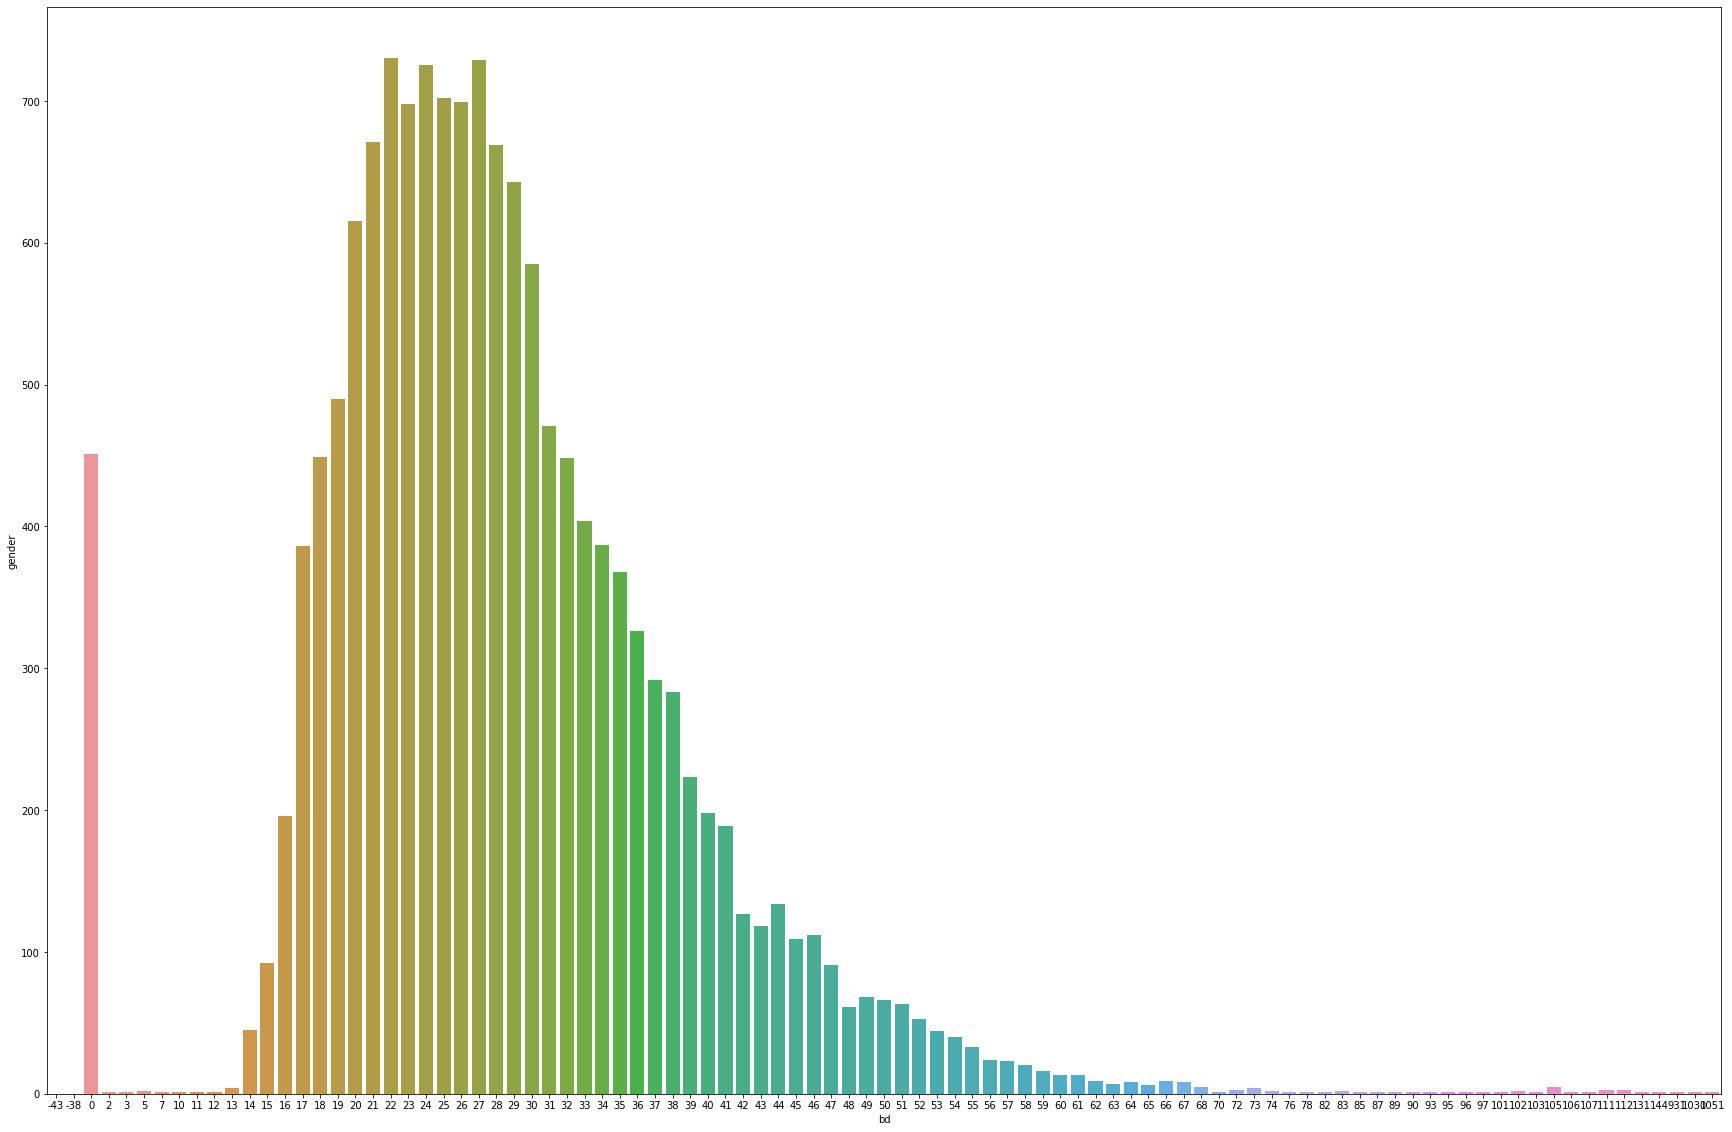

In [20]:
import seaborn as sns
f,axarray = plt.subplots(1,1,figsize=(30,20))
agehist = members.groupby(['bd'],as_index=False).count()
sns.barplot(x=agehist['bd'],y=agehist['gender'])

### 將年齡分為4群，age=0, 0<age$\leq$25, 25<age$\leq$50, 50<age

In [21]:
combine = [train_new, test_new]

for dataset in combine : 
    
    dataset.loc[(dataset['bd'] <= 0), 'age_category'] = 0
    dataset.loc[(dataset['bd'] > 0) & (dataset['bd'] <= 25), 'age_category'] = 2
    dataset.loc[(dataset['bd'] > 25) & (dataset['bd'] <= 50), 'age_category'] = 1
    dataset.loc[(dataset['bd'] > 50), 'age_category'] = 3
    
    
print(train_new['age_category'].value_counts())
print(test_new['age_category'].value_counts())
train_new.drop(["bd"],axis=1,inplace=True)
test_new.drop(["bd"],axis=1,inplace=True)
train_new.head()

0.0    2940694
1.0    2478707
2.0    1830345
3.0     127672
Name: age_category, dtype: int64
0.0    1043259
1.0     869338
2.0     600652
3.0      43541
Name: age_category, dtype: int64


,source_system_tab,source_screen_name,source_type,target,song_length,language,city,gender,registered_via,registration_init_time,expiration_date,artist_repeat_percentage,age_category
0,1,7,6,1,206471.0,52.0,1,1,7,2012-01-02,2017-10-05,46.3,0.0
1,3,8,4,1,284584.0,52.0,13,0,9,2011-05-25,2017-09-11,51.0,2.0
2,3,8,4,1,225396.0,52.0,13,0,9,2011-05-25,2017-09-11,21.5,2.0
3,3,8,4,1,255512.0,-1.0,13,0,9,2011-05-25,2017-09-11,100.0,2.0
4,1,7,6,1,187802.0,52.0,1,1,7,2012-01-02,2017-10-05,37.7,0.0


## 算出使用者有效時間

In [22]:
train_new['validity_days'] = (train_new['expiration_date'] - train_new['registration_init_time']).dt.days

test_new['validity_days'] = (test_new['expiration_date'] - test_new['registration_init_time']).dt.days

train_new.drop(["registration_init_time","expiration_date"],axis=1,inplace=True)

test_new.drop(["registration_init_time","expiration_date"],axis=1,inplace=True)

train_new.head()

,source_system_tab,source_screen_name,source_type,target,song_length,language,city,gender,registered_via,artist_repeat_percentage,age_category,validity_days
0,1,7,6,1,206471.0,52.0,1,1,7,46.3,0.0,2103
1,3,8,4,1,284584.0,52.0,13,0,9,51.0,2.0,2301
2,3,8,4,1,225396.0,52.0,13,0,9,21.5,2.0,2301
3,3,8,4,1,255512.0,-1.0,13,0,9,100.0,2.0,2301
4,1,7,6,1,187802.0,52.0,1,1,7,37.7,0.0,2103


In [23]:
y_train = train_new.iloc[:,3].values
train_new.drop(["target"],axis=1,inplace=True)

X_train = train_new

In [24]:
test_new.drop(["id"],axis=1,inplace=True)
X_test = test_new
X_test.head()

,source_system_tab,source_screen_name,source_type,song_length,language,city,gender,registered_via,artist_repeat_percentage,age_category,validity_days
0,3,8,3,224130.0,3.0,1,1,7,52.0,0.0,577
1,3,8,3,320470.0,3.0,1,1,7,58.6,0.0,577
2,0,8,9,315899.0,17.0,1,1,4,28.9,0.0,7
3,5,16,7,285210.0,52.0,3,1,9,32.7,1.0,3567
4,5,16,7,197590.0,-1.0,3,1,9,32.8,1.0,3567


## Standardization

In [25]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

## Linear Discriminant Analysis

In [26]:
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

#lda=LDA(n_components=1)
#X_train_lda=lda.fit_transform(X_train_std,y_train)
#X_test_lda=lda.transform(X_test_std)

## Principal Component Analysis

In [27]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 10)
X_train_pca=pca.fit_transform(X_train_std,y_train)
X_test_pca=pca.transform(X_test_std)

## k-Nearest Neighbors

In [28]:

#from sklearn.neighbors import KNeighborsClassifier

#knn=KNeighborsClassifier(n_neighbors=20,
#                       p=10,
#                       metric='minkowski')
#knn.fit(X_train_pca,y_train)
#y_pred=knn.predict(X_test_pca)



## RandomForest

In [29]:
#from sklearn.ensemble import RandomForestClassifier

#forest = RandomForestClassifier(criterion='gini',
#                                n_estimators = 25, 
#                                random_state = 1,
#                                n_jobs=2)
#forest.fit(X_train_lda,y_train)

#y_pred = forest.predict(X_test_lda)

## LightGBM 

In [30]:
import lightgbm as lgb

d_train = lgb.Dataset(X_train_std, y_train)

params = {}
params['learning_rate'] = 0.05
params['application'] = 'binary'
params['max_depth'] = 50
params['num_leaves'] = 2**10
params['verbosity'] = 0
params['metric'] = 'auc'

model = lgb.train(params,train_set=d_train,num_boost_round=1000,valid_sets=d_train,verbose_eval=50)

[50]	training's auc: 0.719785
[100]	training's auc: 0.740067
[150]	training's auc: 0.752739
[200]	training's auc: 0.761438
[250]	training's auc: 0.767572
[300]	training's auc: 0.773301
[350]	training's auc: 0.777709
[400]	training's auc: 0.781336
[450]	training's auc: 0.785079
[500]	training's auc: 0.788674
[550]	training's auc: 0.791864
[600]	training's auc: 0.794625
[650]	training's auc: 0.797242
[700]	training's auc: 0.799968
[750]	training's auc: 0.802377
[800]	training's auc: 0.804779
[850]	training's auc: 0.807161
[900]	training's auc: 0.80956
[950]	training's auc: 0.811722
[1000]	training's auc: 0.813981


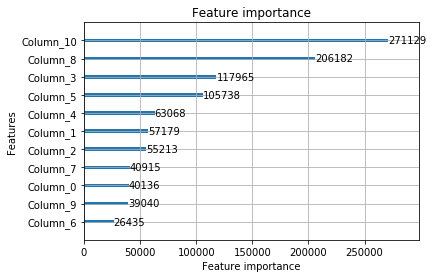

In [31]:
y_pred = model.predict(X_test_std,num_iteration=model.best_iteration)

ax = lgb.plot_importance(model)
plt.show()

In [32]:
print(y_pred)

[6.06748987e-01 6.63044844e-01 1.75259473e-01 ... 2.98746731e-01
 1.01799520e-05 1.12825812e-05]


In [33]:
ID = df_test.iloc[:,0].values
output = np.vstack((ID,y_pred))

array([[0.00000000e+00, 1.00000000e+00, 2.00000000e+00, ...,
        2.55678700e+06, 2.55678800e+06, 2.55678900e+06],
       [6.06748987e-01, 6.63044844e-01, 1.75259473e-01, ...,
        2.98746731e-01, 1.01799520e-05, 1.12825812e-05]])

### 存成kaggle 要求的csv格式，以便做評分

In [35]:
result_df = pd.DataFrame()

result_df['id'] = ID
result_df['target'] = y_pred

In [36]:
result_df.to_csv('submission_new.csv', index=False, float_format = '%.5f')